In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.special import gamma

plt.style.use('ggplot')

In [ ]:
# https://artmenlope.github.io/plotting-complex-variable-functions/

# https://en.wikipedia.org/wiki/Domain_coloring
# https://en.wikipedia.org/wiki/Casorati%E2%80%93Weierstrass_theorem
# https://www.grc.nasa.gov/www/k-12/airplane/map.html

In [2]:
N = 500
lim = 4

x, y = np.meshgrid(np.linspace(-lim, lim, N),
                   np.linspace(-lim, lim, N))
z = x + 1j*y

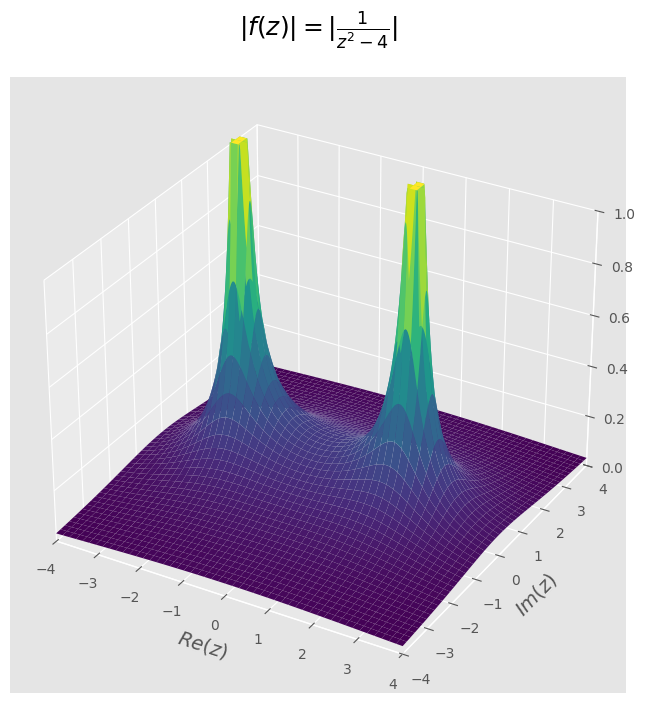

In [3]:
f = abs(1/(z**2 - 4))
f[f > 1.3] = 1.3 # Cut the function at the poles for decoration purposes.

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', xlim=(-lim, lim), ylim=(-lim, lim), zlim=(0, 1))

ax.plot_surface(x, y, f, cmap='viridis', shade=True, alpha=1)
ax.set_xlabel(r'$Re(z)$', size=14)
ax.set_ylabel(r'$Im(z)$', size=14)
ax.set_title(r'$|f(z)|=|\frac{1}{z^2-4}|$', size=18, pad=30);


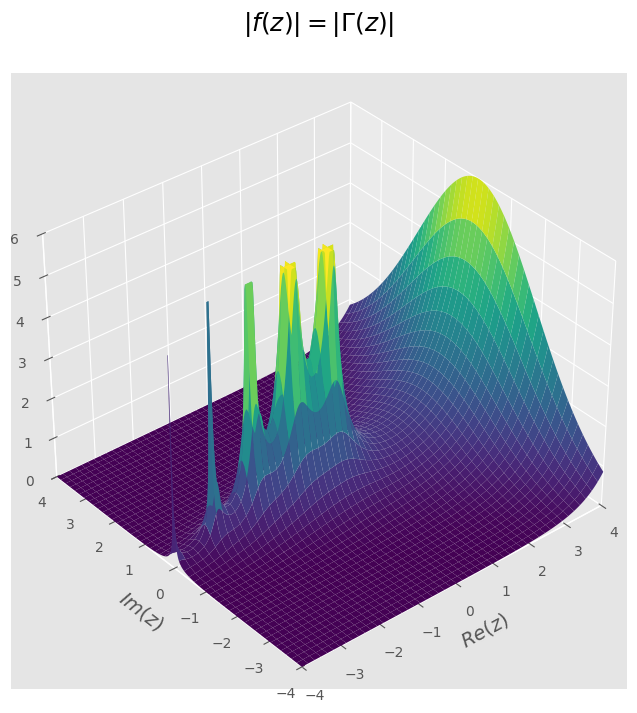

In [4]:
f = abs(gamma(z))
f[f>6] = 6

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', xlim=(-lim, lim), ylim=(-lim, lim), zlim=(0, 6))

ax.plot_surface(x, y, f, cmap='viridis', shade=True, alpha=1)
ax.set_xlabel(r'$Re(z)$', size=14)
ax.set_ylabel(r'$Im(z)$', size=14)
ax.set_title(r'$|f(z)|=|\Gamma (z)|$', size=18, pad=30)
ax.view_init(azim=-130, elev=35)

Text(0.5, 0.92, '$Im \\,\\, f(z)$')

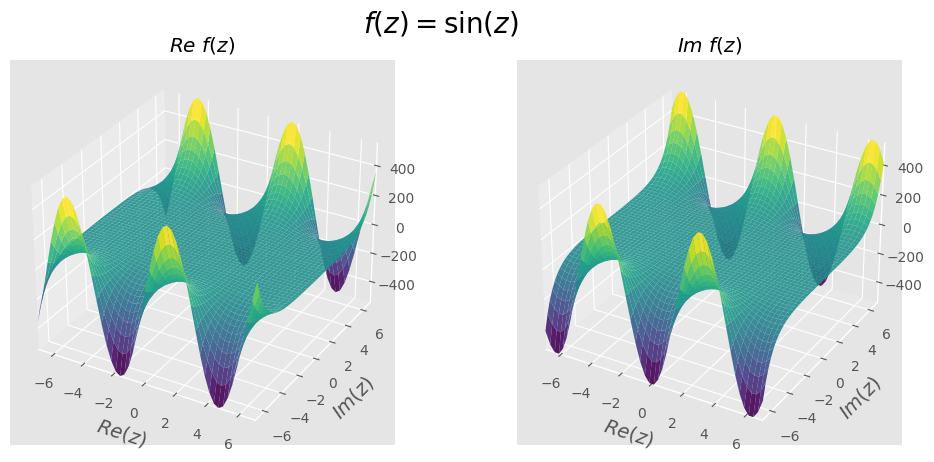

In [5]:
N = 50
lim = 7

x, y = np.meshgrid(np.linspace(-lim, lim, N),
                   np.linspace(-lim, lim, N))
z = x + 1j*y
f = np.sin(z)

fig = plt.figure(figsize=(12,5))
fig.suptitle(r'$f(z) = \sin(z)$', fontsize=20)
ax1 = fig.add_subplot(121, projection='3d', xlim=(-lim, lim), ylim=(-lim, lim))
ax2 = fig.add_subplot(122, projection='3d', xlim=(-lim, lim), ylim=(-lim, lim))

ax1.plot_surface(x, y, f.real, cmap='viridis', shade=True, alpha=0.9, label='Re f(z)')
ax2.plot_surface(x, y, f.imag, cmap='viridis', shade=True, alpha=0.9, label='Im f(z)')

ax1.set_zlim(f.real.min(), f.real.max())
ax1.set_xlabel(r'$Re(z)$', fontsize=14)
ax1.set_ylabel(r'$Im(z)$', fontsize=14)
ax1.set_title(r'$Re \,\, f(z)$') # \, adds space

ax2.set_zlim(f.imag.min(), f.imag.max())
ax2.set_xlabel(r'$Re(z)$', fontsize=14)
ax2.set_ylabel(r'$Im(z)$', fontsize=14)
ax2.set_title(r'$Im \,\, f(z)$')

In [6]:
from colorsys import hls_to_rgb


def colorize(fz):

    """
    The original colorize function can be found at:
    https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
    by the user nadapez.
    """

    r = np.log2(1. + np.abs(fz))

    h = np.angle(fz)/(2*np.pi)
    l = 1 - 0.45**(np.log(1+r))
    s = 1

    c = np.vectorize(hls_to_rgb)(h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (m,n,3)
    c = np.rot90(c.transpose(2,1,0), 1) # Change shape to (m,n,3) and rotate 90 degrees

    return c



In [7]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label=r'$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label=r'$Arg$ $f(z)=0$', markersize=10, lw=0)]

N = 500

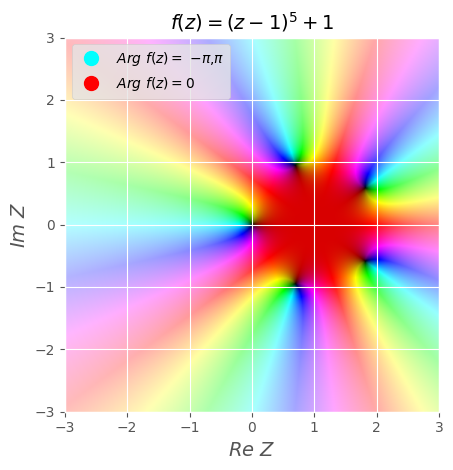

In [8]:
lim = 3
x, y = np.meshgrid(np.linspace(-lim, lim, N),
                   np.linspace(-lim, lim, N))
z = x + 1j*y
f = (z-1)**5+1

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim, lim, -lim, lim])
ax.set_xlabel(r'$Re$ $Z$', fontsize=14)
ax.set_ylabel(r'$Im$ $Z$', fontsize=14)
ax.set_title(r'$f(z)=(z-1)^5+1$', fontsize=14)

plt.tight_layout()

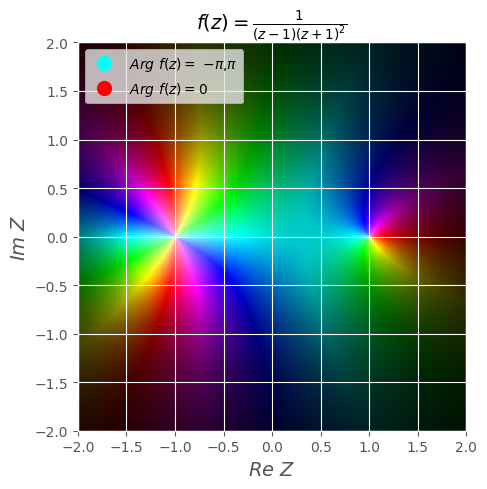

In [9]:
lim = 2
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = 1/((z-1)*(z+1)**2)

fig, ax = plt.subplots(figsize=(5,5))
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel(r'$Re$ $Z$', fontsize=14)
ax.set_ylabel(r'$Im$ $Z$', fontsize=14)
ax.set_title(r'$f(z)=\frac{1}{(z-1)(z+1)^2}$', fontsize=14)

plt.tight_layout()

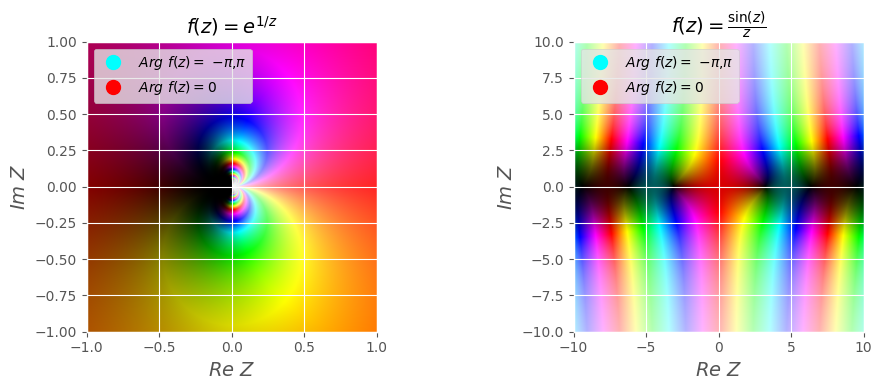

In [10]:
#__exp(1/z)___________________________________________

lim = 1
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = np.exp(1/z)

fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,4))
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel(r'$Re$ $Z$', fontsize=14)
ax.set_ylabel(r'$Im$ $Z$', fontsize=14)
ax.set_title(r'$f(z)=e^{1/z}$', fontsize=14)


#__sin(z)/z___________________________________________

lim = 10
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = np.sin(z)/z

ax2.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax2.imshow(img, extent=[-lim,lim, -lim,lim])
ax2.set_xlabel(r'$Re$ $Z$', fontsize=14)
ax2.set_ylabel(r'$Im$ $Z$', fontsize=14)
ax2.set_title(r'$f(z)=\frac{\sin(z)}{z}$', fontsize=14)

plt.tight_layout()

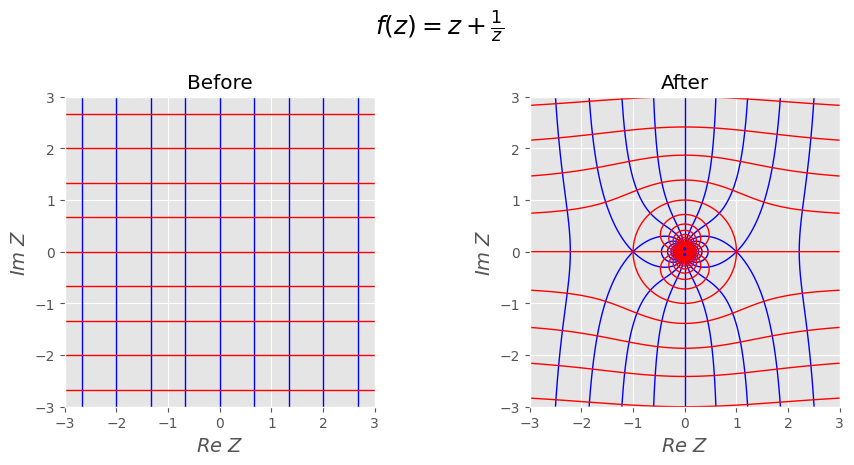

In [11]:
def f(z):
    return z + 1/z


# The x and y coordinates
lim = 3
N = 300
Xv = np.linspace(-lim, lim, N)
Yv = np.linspace(-lim, lim, N)
X, Y = np.meshgrid(Xv, Yv)

# Values of f as a function of z=x+iy
Z = X+1j*Y
Fv = f(Z)
lv = np.linspace(-10,10,31)

# Contours of constant Re f(z) and Im f(z) as a function of x and y

fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle(r"$f(z)=z+\frac{1}{z}$", fontsize=18)
ax.set_aspect("equal")
ax2.set_aspect("equal")

ax.contour(Xv, Yv, X, colors='blue', linestyles='solid', levels=lv, linewidths=1)
ax.contour(Xv, Yv, Y, colors='red', linestyles='solid', levels=lv, linewidths=1)
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title("Before")

ax2.contour(Xv, Yv, np.real(Fv), colors='blue', linestyles='solid', levels=lv, linewidths=1)
ax2.contour(Xv, Yv, np.imag(Fv), colors='red', linestyles='solid', levels=lv, linewidths=1)
ax2.set_xlabel("$Re$ $Z$", fontsize=14)
ax2.set_ylabel("$Im$ $Z$", fontsize=14)
ax2.set_title("After")

plt.subplots_adjust(wspace=0.5)

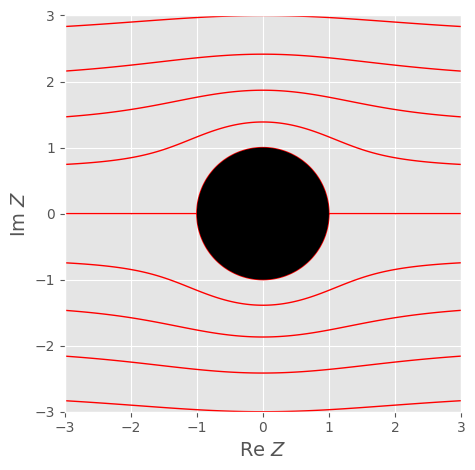

In [12]:
from matplotlib.patches import Circle

fig, ax = plt.subplots()
ax.set_aspect("equal")

Circ = Circle((0,0), radius=1, facecolor="black", alpha=1, zorder=10)
ax.add_patch(Circ)

ax.contour(Xv, Yv, np.imag(Fv), colors='red', linestyles='solid', levels=lv, linewidths=1)
ax.set_xlabel("Re $Z$", fontsize=14)
ax.set_ylabel("Im $Z$", fontsize=14)

plt.tight_layout()

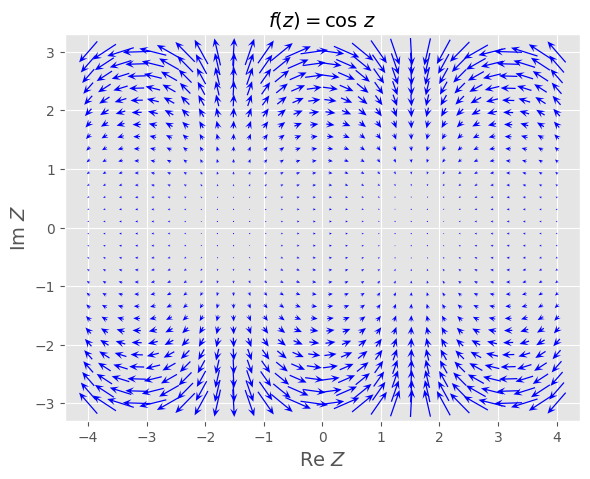

In [14]:
def f(z):
    return np.cos(z)


# The x and y coordinates
lim = 3
N = 30
Xv = np.linspace(-lim-1, lim+1, N)
Yv = np.linspace(-lim, lim, N)
X, Y = np.meshgrid(Xv, Yv)

# Values of f as a function of z=x+iy
Z = X+1j*Y
Fv = f(Z)
lv = np.linspace(-10, 10, 31)

# Plotting part
fig, ax = plt.subplots(figsize=(6,5))
ax.set_aspect("equal")
ax.set_xlabel("Re $Z$", fontsize=14)
ax.set_ylabel("Im $Z$", fontsize=14)
ax.set_title(r"$f(z)=\cos \, z$", fontsize=14)
ax.quiver(X, Y, np.real(Fv), np.imag(Fv), color='blue', pivot="middle", headwidth=6, headlength=7 )

plt.tight_layout()